In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [18]:
vistas        = pd.read_csv('~/orga-datos/datos_preprocesados/fiuba_3_vistas.csv')

In [19]:
postulaciones = pd.read_csv('~/orga-datos/datos_preprocesados/fiuba_4_postulaciones.csv')

In [20]:
avisos_online = pd.read_csv('~/orga-datos/datos_preprocesados/fiuba_5_avisos_online.csv')

In [2]:
avisos_detalle = pd.read_csv('~/orga-datos/datos_preprocesados/fiuba_6_avisos_detalle.csv')

In [3]:
avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [5]:
len(avisos_detalle)

19685

In [5]:
# Estas columnas no aportan suficiente información
# idpais: Siempre vale 1
# ciudad: Hay alrededor de 50 registros con esta información, el resto es NaN
# mapacalle: Hay sólo 683 registros con esta información.
avisos_detalle = avisos_detalle.drop(axis=1, labels=['idpais', 'ciudad', 'mapacalle'])

In [28]:
(avisos_detalle['nombre_area'].value_counts()).describe()

count     186.000000
mean      105.833333
std       262.884599
min         1.000000
25%         6.000000
50%        26.500000
75%        97.500000
max      2464.000000
Name: nombre_area, dtype: float64

In [27]:
avisos_detalle['nombre_area'].value_counts()[(avisos_detalle['nombre_area'].value_counts() > 100)].sum()

16331

In [6]:
avisos_detalle.head()

,idaviso,titulo,descripcion,nombre_zona,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,VENDEDOR/A PROVINCIA DE SANTA FE,<p><strong><strong>Empresa:</strong></strong> ...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,Enfermeras,<p>Solicitamos para importante cadena de farma...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,Chofer de taxi,<p>TE GUSTA MANEJAR? QUERES GANAR PLATA HACIEN...,Capital Federal,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,<p><strong>Somos una empresa multinacional que...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,Operarios de Planta - Rubro Electrodomésticos,<p><strong>OPERARIOS DE PLANTA</strong></p><p>...,Gran Buenos Aires,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [7]:
desc = avisos_detalle.iloc[1]['descripcion']

In [3]:
from descripcion_parser import parse as dp_parse

In [4]:
avisos_detalle['descripcion'] = avisos_detalle['descripcion'].map(dp_parse)

In [5]:
avisos_detalle.head()

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
0,8725750,1,VENDEDOR/A PROVINCIA DE SANTA FE,empresa distribuidor repuestos automotor imp...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Comercial,VENTOR
1,17903700,1,Enfermeras,solicitamos importante cadena farmacias zona o...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Salud,Farmacias Central Oeste
2,1000150677,1,Chofer de taxi,te gusta manejar ganar haciendo lo te gusta ...,Capital Federal,NaN,Empedrado 2336,Full-time,Senior / Semi-Senior,Transporte,FAMITAX SRL
3,1000610287,1,CHOFER DE CAMIONETA BAHIA BLANCA - PUNTA ALTA,somos una empresa multinacional opera argentin...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Transporte,Wurth Argentina S.A
4,1000872556,1,Operarios de Planta - Rubro Electrodomésticos,operarios planta nos encontramos busqueda oper...,Gran Buenos Aires,NaN,NaN,Full-time,Senior / Semi-Senior,Producción,ELECTRO OUTLET SRL


In [27]:
vistas[vistas['idpostulante'] == '']

,idAviso,timestamp,idpostulante


In [28]:
avisos_detalle[avisos_detalle['idaviso'] == 1112299696]

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa
4510,1112299696,1,CONVOCATORIA A DOCENTES CON EXPERIENCIA EN EDU...,se requiere para portal educativo on-line: htt...,Gran Buenos Aires,NaN,NaN,Part-time,Otro,Educación/ Docentes,INSTITUTO DE EDUCACION SUPERIOR
15400,1112299696,1,CONVOCATORIA A DOCENTES CON EXPERIENCIA EN EDU...,se requiere para portal educativo on-line: htt...,Gran Buenos Aires,NaN,NaN,Part-time,Otro,Educación/ Docentes,INSTITUTO DE EDUCACION SUPERIOR


In [29]:
postulantes = pd.read_csv('/home/luciano/orga-datos/datos_preprocesados/postulantes.csv')

/usr/local/lib/python3.5/dist-packages/IPython/core/interactiveshell.py:2785: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [30]:
postulantes.head()

,idpostulante,Doctorado,Master,Otro,Posgrado,Secundario,Terciario/Técnico,Universitario,fechanacimiento,sexo
0,0z5Dmrd,0,0,0,0,0,0,Graduado,1965-10-22,MASC
1,0z5JW1r,0,0,Graduado,0,Graduado,Graduado,Abandonado,1971-04-09,MASC
2,0z5VvGv,0,0,0,0,Graduado,0,0,1987-10-18,MASC
3,0zB01pE,0,0,0,0,0,Graduado,Abandonado,1989-12-01,MASC
4,0zB026d,0,0,0,0,Graduado,Graduado,0,1978-02-23,FEM


In [31]:
postulantes[postulantes['idpostulante'] == '6M9ZQR']

,idpostulante,Doctorado,Master,Otro,Posgrado,Secundario,Terciario/Técnico,Universitario,fechanacimiento,sexo
56726,6M9ZQR,Graduado,0,0,0,0,0,Graduado,1976-03-29,FEM


In [43]:
avisos_detalle[avisos_detalle['idaviso'] == 739260]

,idaviso,idpais,titulo,descripcion,nombre_zona,ciudad,mapacalle,tipo_de_trabajo,nivel_laboral,nombre_area,denominacion_empresa


In [ ]:
avisos_detalle.drop_duplicates(subset=['id'])

In [29]:
from sklearn.metrics import jaccard_similarity_score

In [6]:
desc_1 = avisos_detalle['descripcion'][0]
desc_2 = avisos_detalle['descripcion'][1]

In [7]:
dp_parse(desc_1)

'empresa distribuidor repuestos automotor importador distribuidor correas agricolas industriales automotor argentina sexo postulante indistinto area ventas pais ciudad argentina rosario santa fe industria automotriz salario comision ventas vacantes 1 tipo puesto full time nuestra empresa es distribuidora mayorista repuestos automotor importamos distribuimos correas agricolas e industriales buscamos un representante ventas provincia santa fe rosario gran rosari ciudad santa fe zona influencia secundario completo excluyente dedicacion full time experiencia ventas buena presencia movilidad propia domicilio zona conocimiento del ramo ofrecemos comisiones ventas capacitacion cartera clientes fuerte apoyo logistico'

In [36]:
desc_2

'<p>Solicitamos para importante cadena de farmacias de la Zona Oeste, ENFERMERAS con experiencia, para atención en Vacunatorio.</p><p>Requisitos</p><ul><li>Sexo femenino, de 23 a 45 años.</li><li>Resida z/Oeste (excluyente)</li><li>Experiencia mínima de 3 años (preferentemente en vacunatorios)</li><li>Poseer título y matrícula habilitante</li><li>Disponibilidad horaria</li></ul>'

In [8]:
desc_2

'solicitamos importante cadena farmacias zona oeste  enfermeras experiencia  atencion vacunatorio  sexo femenino  23 45 años  resida z oeste  excluyente  experiencia minima 3 años  preferentemente vacunatorios  poseer titulo matricula habilitante disponibilidad horaria'

In [38]:
len(desc_1)

1265

In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.cluster import KMeans

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(avisos_detalle['descripcion'])

In [10]:
from scipy.sparse.linalg import svds
u, s, vt = svds(tfidf_matrix, k=1000)

In [11]:
s = s[::-1]

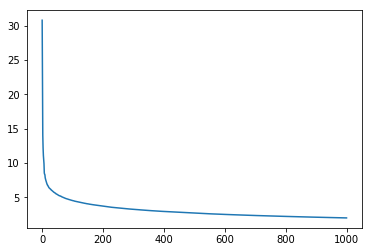

In [12]:
plt.plot(s)
#s[:25]

In [28]:
def calcular_distancias(id_1, id_2):
    dist = np.linalg.norm(u[id_1]-u[id_2])
    print('Desc 1:', avisos_detalle['descripcion'][id_1])
    print()
    print('Desc 2:', avisos_detalle['descripcion'][id_2])
    return dist

In [30]:
calcular_distancias(0, 1)

Desc 1: empresa  distribuidor repuestos automotor  importador distribuidor correas agricolas  industriales automotor argentina sexo postulante  indistinto area  ventas pais ciudad  argentina  rosario santa fe industria  automotriz salario  comision ventas vacantes 1 tipo puesto trabajo  full time nuestra empresa es distribuidora mayorista repuestos automotor  importamos distribuimos correas agricolas e industriales buscamos un representante ventas provincia santa fe  rosario gran rosari  ciudad santa fe zona influencia  requisitos  secundario completo  excluyente  dedicacion full time experiencia ventas buena presencia movilidad propia domicilio zona conocimiento del ramo ofrecemos  comisiones ventas  capacitacion cartera clientes fuerte apoyo logistico

Desc 2: solicitamos importante cadena farmacias zona oeste  enfermeras experiencia  atencion vacunatorio  sexo femenino  23 45 años  resida z oeste  excluyente  experiencia minima 3 años  preferentemente vacunatorios  poseer titulo mat

0.3148997120627826

In [32]:
calcular_distancias(0, 2)

Desc 1: empresa  distribuidor repuestos automotor  importador distribuidor correas agricolas  industriales automotor argentina sexo postulante  indistinto area  ventas pais ciudad  argentina  rosario santa fe industria  automotriz salario  comision ventas vacantes 1 tipo puesto trabajo  full time nuestra empresa es distribuidora mayorista repuestos automotor  importamos distribuimos correas agricolas e industriales buscamos un representante ventas provincia santa fe  rosario gran rosari  ciudad santa fe zona influencia  requisitos  secundario completo  excluyente  dedicacion full time experiencia ventas buena presencia movilidad propia domicilio zona conocimiento del ramo ofrecemos  comisiones ventas  capacitacion cartera clientes fuerte apoyo logistico

Desc 2: te gusta manejar  ganar haciendo lo te gusta  si contas licencia profesional caba ya estas listo empezar  si no tenes te interesa nosotros te ayudamos tramitarla  si tenes entre 21 65 años estas buscando esta es tu oportunidad 

0.2828552917021278

In [40]:
desc = "buscamos un chofer para manejar taxis con licencia profesional en caba horario extendido se trabaja feriados con experiencia en el rubro con probable"

In [46]:
avisos_detalle[avisos_detalle['descripcion'].str.contains('enfermer')]['descripcion']
desc_1719 = avisos_detalle['descripcion'][1719]
desc_1720 = avisos_detalle['descripcion'][1720]

In [48]:
desc_1719

'buscan enfermeros matricula habilitante internacion domiciliaria  inmediato guardias 12 horas pediatriacas diurnas  dia medio 12 horas  zonas nordelta del viso enviar cv'

In [49]:
desc_1720

In [54]:
calcular_distancias(1, 1719)

Desc 1: solicitamos importante cadena farmacias zona oeste  enfermeras experiencia  atencion vacunatorio  sexo femenino  23 45 años  resida z oeste  excluyente  experiencia minima 3 años  preferentemente vacunatorios  poseer titulo matricula habilitante disponibilidad horaria

Desc 2: buscan enfermeros matricula habilitante internacion domiciliaria  inmediato guardias 12 horas pediatriacas diurnas  dia medio 12 horas  zonas nordelta del viso enviar cv


0.2924782922164528

In [38]:
singular_values = s
energy_total = sum(singular_values**2)
sv_pow = singular_values**2
energy_percentage = ((sv_pow / energy_total) * 100)
#print(energy_percentage)
sum(energy_percentage[:250])

59.507487490829966